Визуализация результатов

In [ ]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

In [2]:
path1 = r"***"
path2 = r"***"
path3 = r"***"
path4 = r"***"

In [3]:
df1 = pd.read_excel(path1, sheet_name='All flights')
df2 = pd.read_excel(path2, sheet_name='All flights')
df3 = pd.read_excel(path3, sheet_name='All flights')
df4 = pd.read_excel(path4, sheet_name='All flights')

In [4]:
df1["Date"] = np.where(pd.isnull(df1["Date_departure"]), df1["Date_arrival"],\
             np.where(pd.isnull(df1["Date_arrival"]), df1["Date_departure"], df1["Date_arrival"]))
                      
df1["Date"] = df1["Date"].dt.strftime('%y, %m')  

df2["Date"] = np.where(pd.isnull(df2["Date_departure"]), df2["Date_arrival"],\
             np.where(pd.isnull(df2["Date_arrival"]), df2["Date_departure"], df2["Date_arrival"]))
                      
df2["Date"] = df2["Date"].dt.strftime('%y, %m')  

df3["Date"] = np.where(pd.isnull(df3["Date_departure"]), df3["Date_arrival"],\
             np.where(pd.isnull(df3["Date_arrival"]), df3["Date_departure"], df3["Date_arrival"]))
                      
df3["Date"] = df3["Date"].dt.strftime('%y, %m')  

df4["Date"] = np.where(pd.isnull(df4["Date_departure"]), df4["Date_arrival"],\
             np.where(pd.isnull(df4["Date_arrival"]), df4["Date_departure"], df4["Date_arrival"]))
                      
df4["Date"] = df4["Date"].dt.strftime('%y, %m')  


In [5]:
df1["Date"] = df1["Date"].astype(str)
df1_grouped = df1.groupby('Date')["Date"].count().drop(index = 'nan')
df1_grouped = df1_grouped.sort_index()

df2["Date"] = df2["Date"].astype(str)
df2_grouped = df2.groupby('Date')["Date"].count().drop(index = 'nan')
df2_grouped = df2_grouped.sort_index()

df3["Date"] = df3["Date"].astype(str)
df3_grouped = df3.groupby('Date')["Date"].count().drop(index = 'nan')
df3_grouped = df3_grouped.sort_index()

df4["Date"] = df4["Date"].astype(str)
df4_grouped = df4.groupby('Date')["Date"].count().drop(index = 'nan')
df4_grouped = df4_grouped.sort_index()

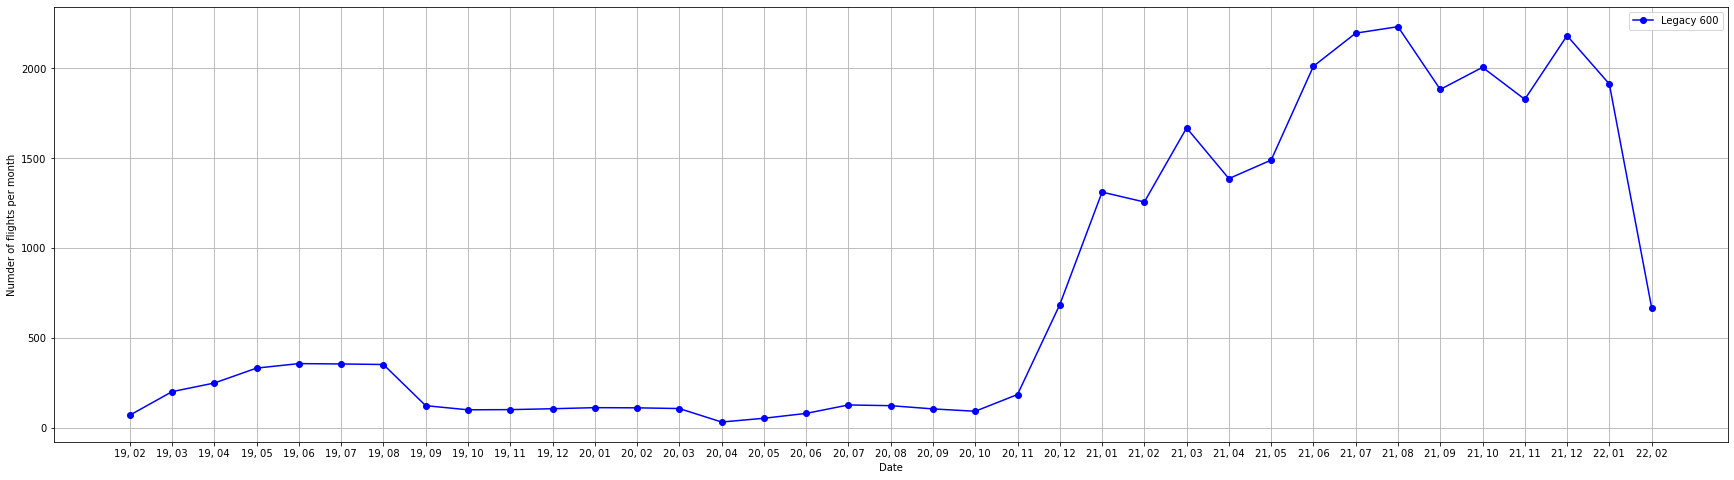

In [30]:
fig, axs = plt.subplots(figsize=(30, 8))
plt.plot(df2_grouped.index,df2_grouped.values, color = 'blue',  marker='o', label='Legacy 600')
plt.legend()
plt.grid()
plt.xlabel('Date')
plt.ylabel('Numder of flights per month')
fig.savefig('result_G600.jpeg')

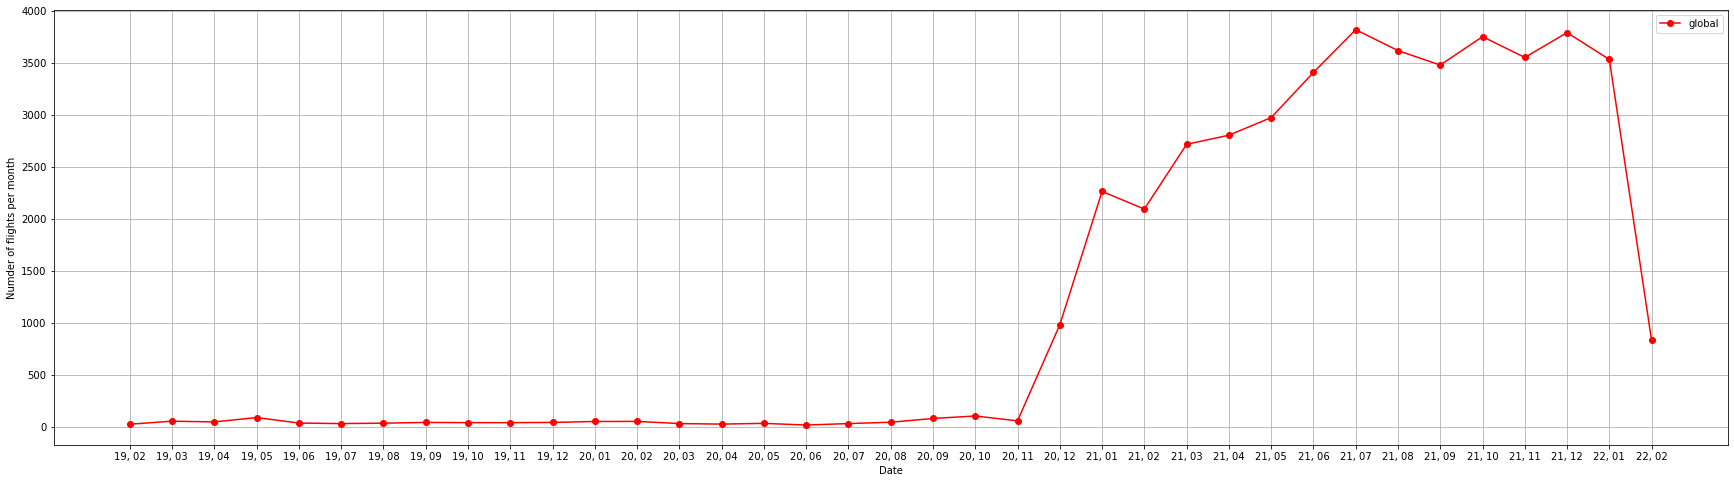

In [29]:
fig, axs = plt.subplots(figsize=(30, 8))
plt.plot(df3_grouped.index,df3_grouped.values, color = 'red',  marker='o', label='global')
plt.legend()
plt.grid()
plt.xlabel('Date')
plt.ylabel('Numder of flights per month')
fig.savefig('Global.jpeg')

Text(0, 0.5, 'Numder of flights per month')

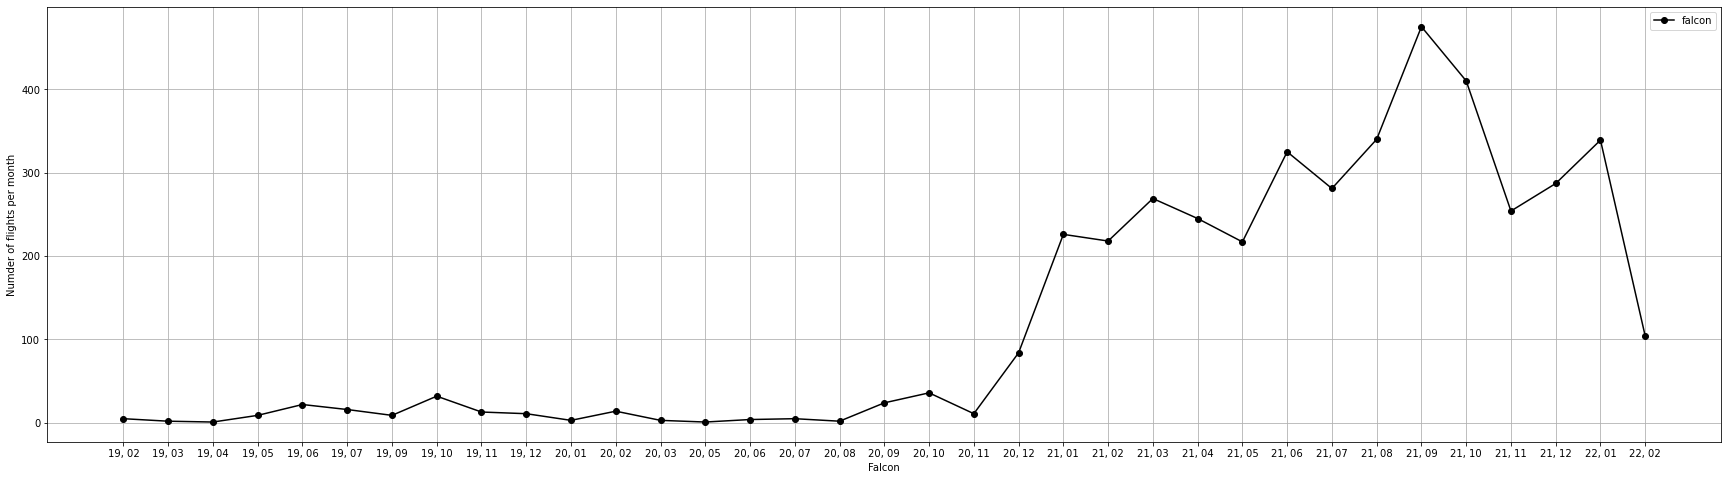

In [31]:
fig, axs = plt.subplots(figsize=(30, 8))
plt.plot(df4_grouped.index,df4_grouped.values, color = 'black',  marker='o', label='falcon')
plt.legend()
plt.grid()
plt.xlabel('Falcon')
plt.ylabel('Numder of flights per month')

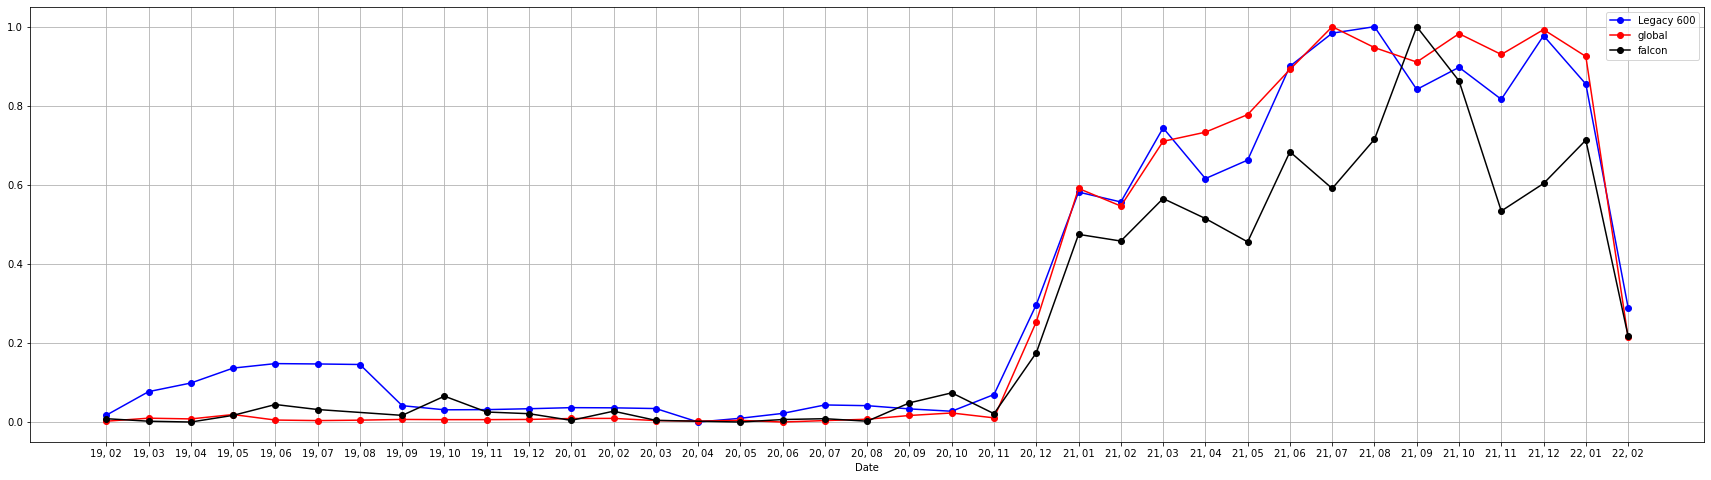

In [33]:
# Нормализованные графики, видер резкий рост увеличения количества перелетов после 11.2020 
# Спад в последнем месяце обусловлен тем, что данные собраны за часть месяца (на дату запроса 10.02.2022)
fig, axs = plt.subplots(figsize=(30, 8))
plt.plot(df2_grouped.index,(df2_grouped.values - min(df2_grouped.values)) / (max(df2_grouped.values) - min(df2_grouped.values)), color = 'b',  marker='o', label='Legacy 600')
plt.plot(df3_grouped.index,(df3_grouped.values - min(df3_grouped.values)) / (max(df3_grouped.values) - min(df3_grouped.values)), color = 'r',  marker='o', label='global')
plt.plot(df4_grouped.index,(df4_grouped.values - min(df4_grouped.values)) / (max(df4_grouped.values) - min(df4_grouped.values)), color = 'black',  marker='o', label='falcon')
plt.legend()
plt.grid()
plt.xlabel('Date')
fig.savefig('result_all_normalize.jpeg')